In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [202]:
df =pd.read_csv('/Users/aimaldastagirzada/Downloads/Churn_Modelling.csv')

In [203]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [204]:
df.drop(columns='RowNumber', index=1, inplace=True)

In [205]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9999 non-null   int64  
 1   Surname          9999 non-null   object 
 2   CreditScore      9999 non-null   int64  
 3   Geography        9999 non-null   object 
 4   Gender           9999 non-null   object 
 5   Age              9999 non-null   int64  
 6   Tenure           9999 non-null   int64  
 7   Balance          9999 non-null   float64
 8   NumOfProducts    9999 non-null   int64  
 9   HasCrCard        9999 non-null   int64  
 10  IsActiveMember   9999 non-null   int64  
 11  EstimatedSalary  9999 non-null   float64
 12  Exited           9999 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [207]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.999000e+03,9999,9999.000000,9999,9999,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.533053,NaN,NaN,38.921592,5.013201,76485.157018,1.530253,0.705571,0.515052,100088.994522,0.203720
std,7.193846e+04,NaN,96.657196,NaN,NaN,10.488310,2.892041,62400.482648,0.581659,0.455809,0.499798,57513.234001,0.402784
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97208.460000,1.000000,1.000000,1.000000,100187.430000,0.000000
75%,1.575324e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.000000


Nan values must be replaced 

In [208]:
df[df['Age'].isnull() & df['Surname'].isnull()]


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [209]:
df[df['Balance'].isnull() & df['Geography'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9999 non-null   int64  
 1   Surname          9999 non-null   object 
 2   CreditScore      9999 non-null   int64  
 3   Geography        9999 non-null   object 
 4   Gender           9999 non-null   object 
 5   Age              9999 non-null   int64  
 6   Tenure           9999 non-null   int64  
 7   Balance          9999 non-null   float64
 8   NumOfProducts    9999 non-null   int64  
 9   HasCrCard        9999 non-null   int64  
 10  IsActiveMember   9999 non-null   int64  
 11  EstimatedSalary  9999 non-null   float64
 12  Exited           9999 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [211]:
num_column= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

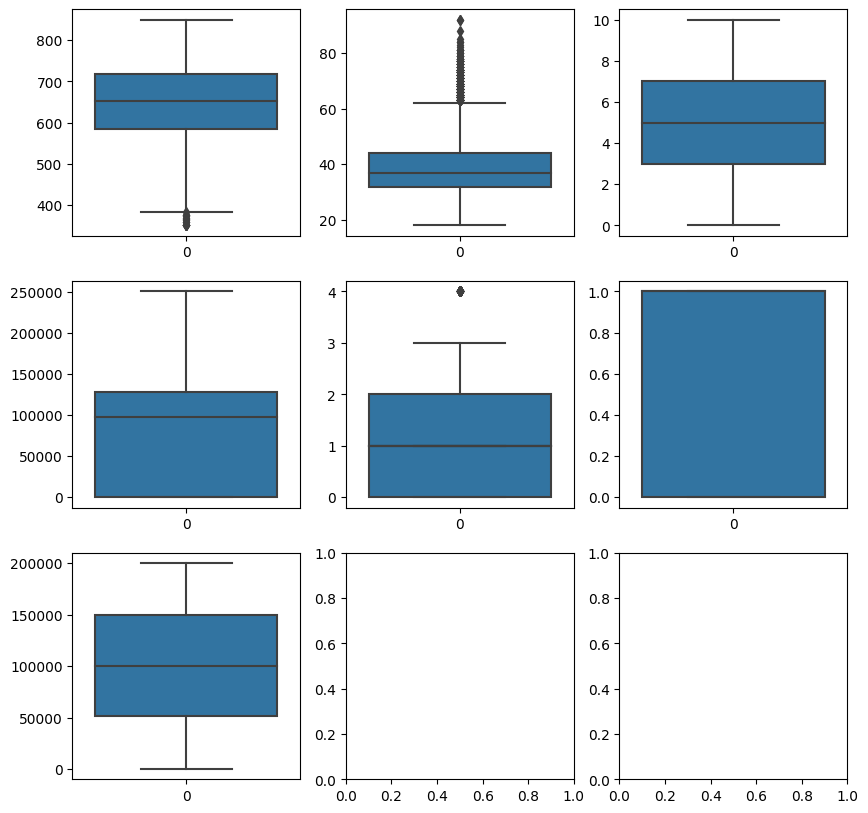

In [212]:
fig, axs=plt.subplots(3,3, figsize=(10,10))
plt1= sns.boxplot(df['CreditScore'], ax=axs[0][0])
plt2= sns.boxplot(df['Age'], ax=axs[0][1])
plt3=sns.boxplot(df['Tenure'], ax=axs[0][2])
plt4=sns.boxplot(df['Balance'], ax=axs[1][0])
plt5=sns.boxplot(df['NumOfProducts'], ax=axs[1][1])
plt6=sns.boxplot(df['HasCrCard'], ax=axs[1][1])
plt7=sns.boxplot(df['IsActiveMember'],ax=axs[1][2])
plt8= sns.boxplot(df['EstimatedSalary'], ax=axs[2][0])

In [213]:
for column in num_column:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis= {k}')


CreditScore: skewness = -0.07171786487336276, kurtosis= -0.4262616369711787
Age: skewness = 1.0111826295258952, kurtosis= 1.393724650338699
Tenure: skewness = 0.010843313119441993, kurtosis= -1.1650963340375895
Balance: skewness = -0.14104573545673052, kurtosis= -1.4894206595395216
NumOfProducts: skewness = 0.745313965104224, kurtosis= 0.5819856715685714
HasCrCard: skewness = -0.9020488660457121, kurtosis= -1.186307843265645
IsActiveMember: skewness = -0.06023331824002854, kurtosis= -1.9963719473737955
EstimatedSalary: skewness = 0.002148903565895132, kurtosis= -1.1816925419876019


In [214]:
for column in num_column:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis= {k}')

CreditScore: skewness = -0.07171786487336276, kurtosis= -0.4262616369711787
Age: skewness = 1.0111826295258952, kurtosis= 1.393724650338699
Tenure: skewness = 0.010843313119441993, kurtosis= -1.1650963340375895
Balance: skewness = -0.14104573545673052, kurtosis= -1.4894206595395216
NumOfProducts: skewness = 0.745313965104224, kurtosis= 0.5819856715685714
HasCrCard: skewness = -0.9020488660457121, kurtosis= -1.186307843265645
IsActiveMember: skewness = -0.06023331824002854, kurtosis= -1.9963719473737955
EstimatedSalary: skewness = 0.002148903565895132, kurtosis= -1.1816925419876019


In [215]:
df2 = df.copy()

In [216]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[num_column])
threshold = 3
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9798 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9798 non-null   int64  
 1   Surname          9798 non-null   object 
 2   CreditScore      9798 non-null   int64  
 3   Geography        9798 non-null   object 
 4   Gender           9798 non-null   object 
 5   Age              9798 non-null   int64  
 6   Tenure           9798 non-null   int64  
 7   Balance          9798 non-null   float64
 8   NumOfProducts    9798 non-null   int64  
 9   HasCrCard        9798 non-null   int64  
 10  IsActiveMember   9798 non-null   int64  
 11  EstimatedSalary  9798 non-null   float64
 12  Exited           9798 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [218]:
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[num_column])
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9798 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9798 non-null   int64  
 1   Surname          9798 non-null   object 
 2   CreditScore      9798 non-null   int64  
 3   Geography        9798 non-null   object 
 4   Gender           9798 non-null   object 
 5   Age              9798 non-null   int64  
 6   Tenure           9798 non-null   int64  
 7   Balance          9798 non-null   float64
 8   NumOfProducts    9798 non-null   int64  
 9   HasCrCard        9798 non-null   int64  
 10  IsActiveMember   9798 non-null   int64  
 11  EstimatedSalary  9798 non-null   float64
 12  Exited           9798 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


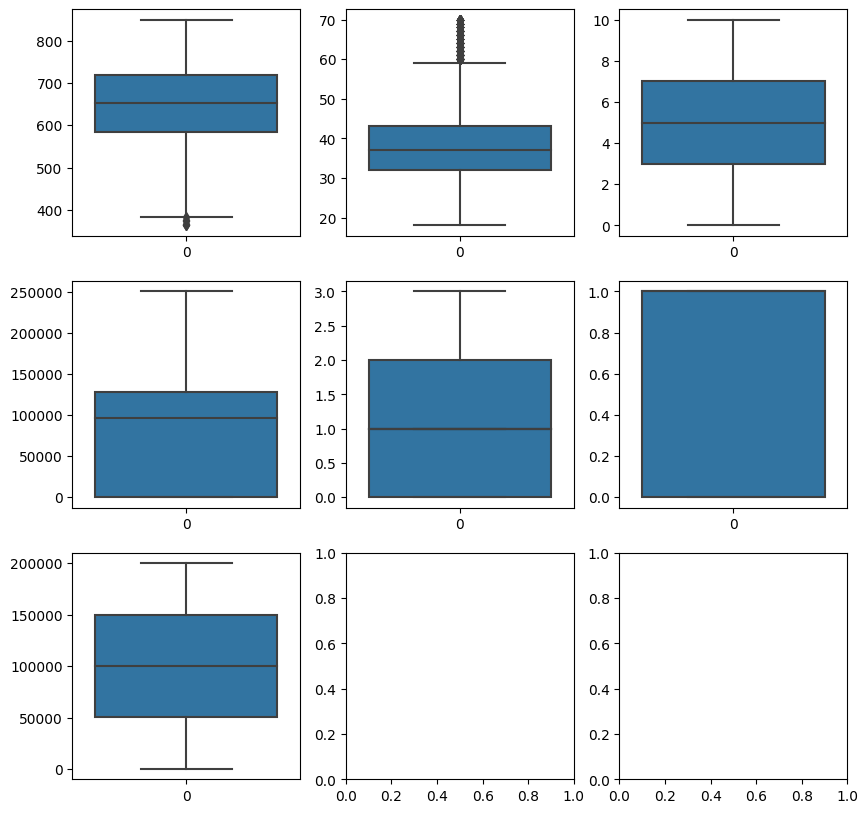

In [220]:
fig, axs=plt.subplots(3,3, figsize=(10,10))
plt1= sns.boxplot(df['CreditScore'], ax=axs[0][0])
plt2= sns.boxplot(df['Age'], ax=axs[0][1])
plt3=sns.boxplot(df['Tenure'], ax=axs[0][2])
plt4=sns.boxplot(df['Balance'], ax=axs[1][0])
plt5=sns.boxplot(df['NumOfProducts'], ax=axs[1][1])
plt6=sns.boxplot(df['HasCrCard'], ax=axs[1][1])
plt7=sns.boxplot(df['IsActiveMember'],ax=axs[1][2])
plt8= sns.boxplot(df['EstimatedSalary'], ax=axs[2][0])

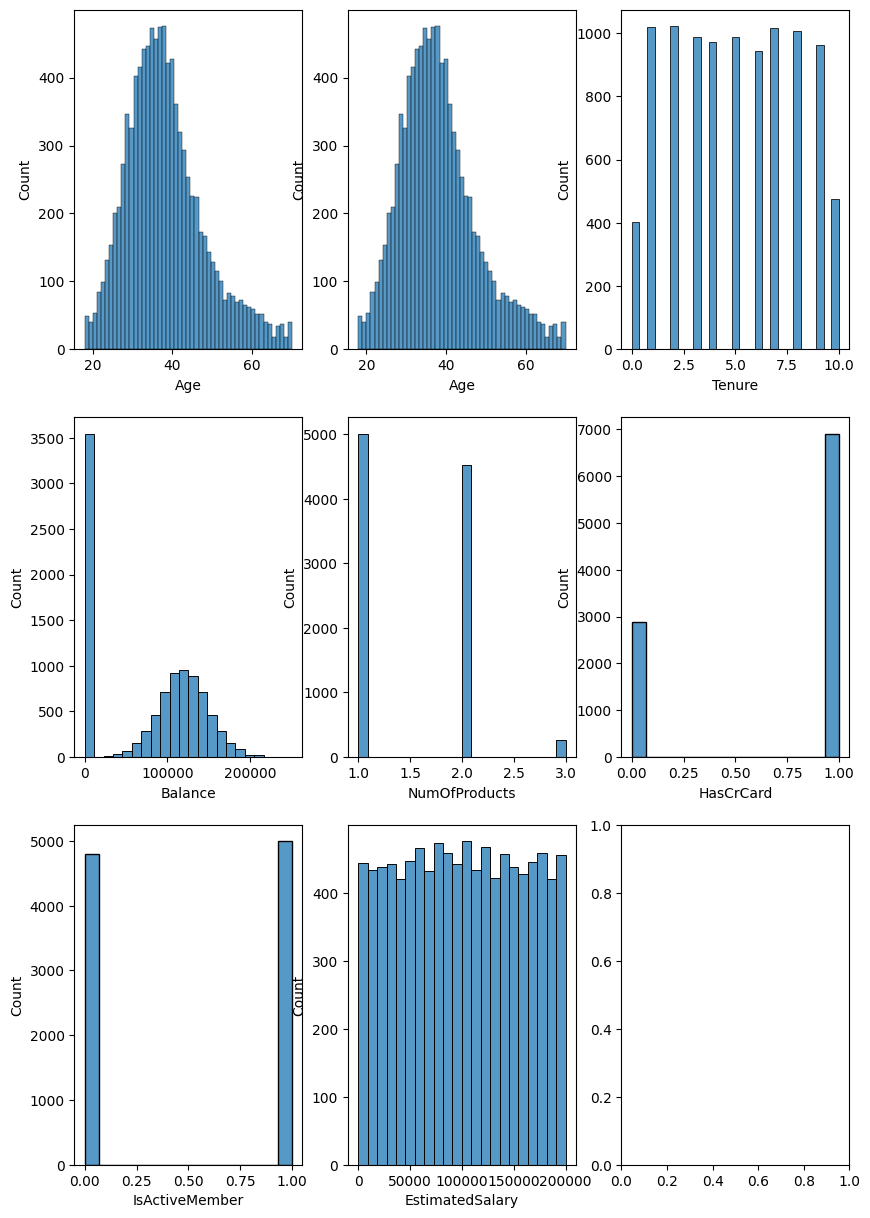

In [221]:
fig, axs=plt.subplots(3,3, figsize=(10,15))
plt1=sns.histplot(df['Age'], ax=axs[0][0])
plt2=sns.histplot(df['Age'], ax=axs[0][1])
plt3=sns.histplot(df['Tenure'], ax=axs[0][2])
plt4=sns.histplot(df['Balance'], ax=axs[1][0])
plt5=sns.histplot(df['NumOfProducts'], ax=axs[1][1])
plt6=sns.histplot(df['HasCrCard'], ax=axs[1][2])
plt7=sns.histplot(df['IsActiveMember'],ax=axs[2][0])
plt8=sns.histplot(df['EstimatedSalary'], ax=axs[2][1])

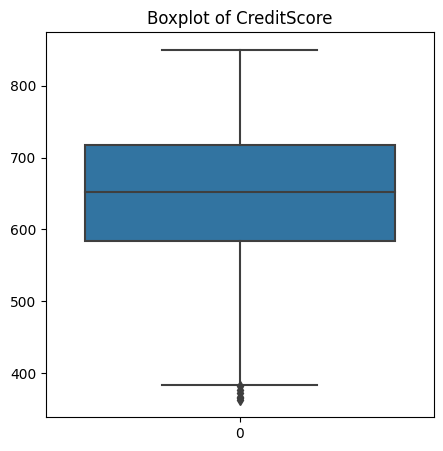

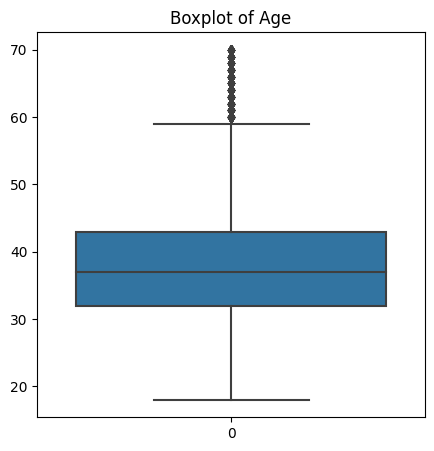

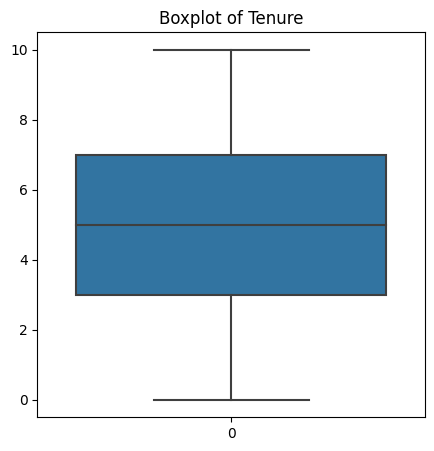

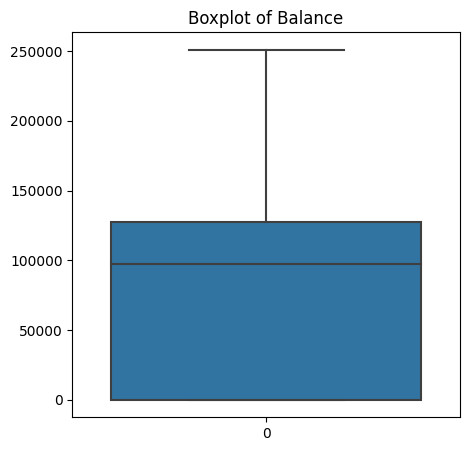

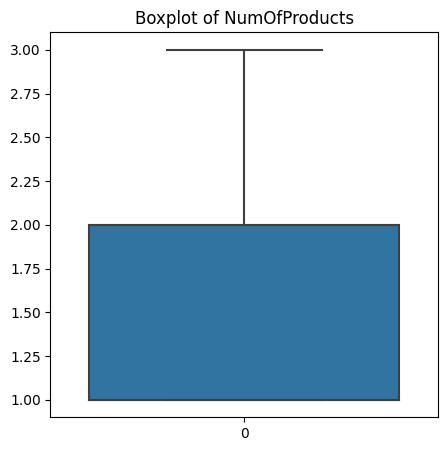

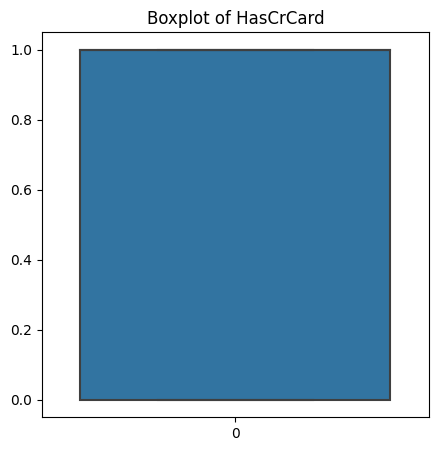

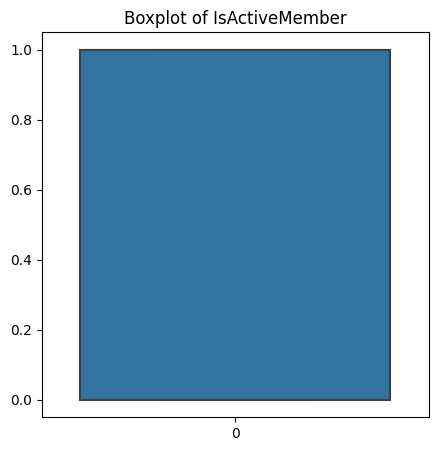

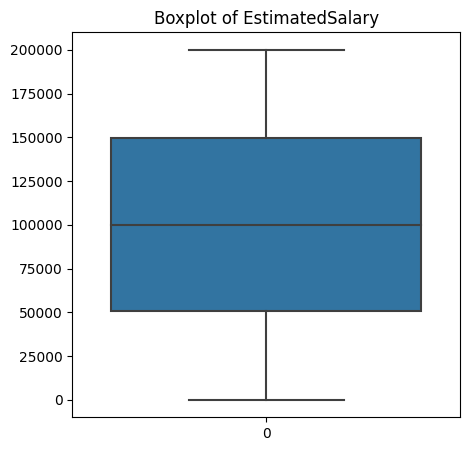

In [222]:
for column in num_column:
    plt.figure(figsize=(5, 5))
    sns.boxplot(df[column])
    plt.title(f'{"Boxplot"} of {column}')


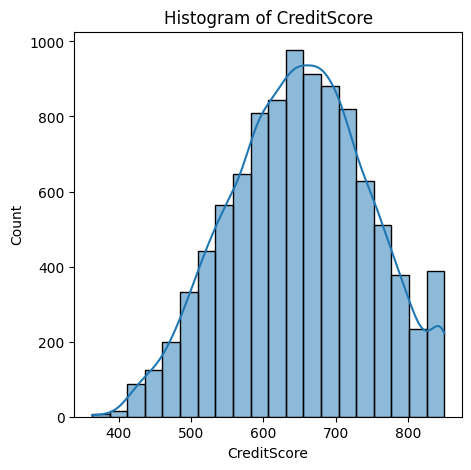

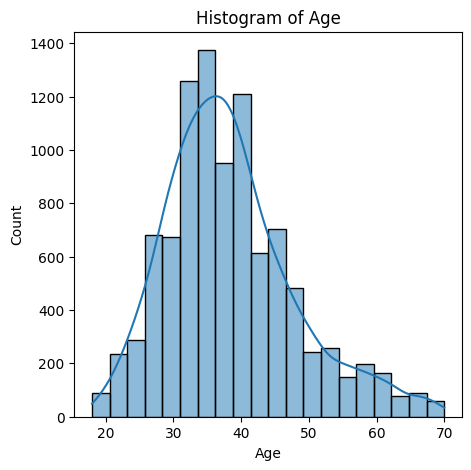

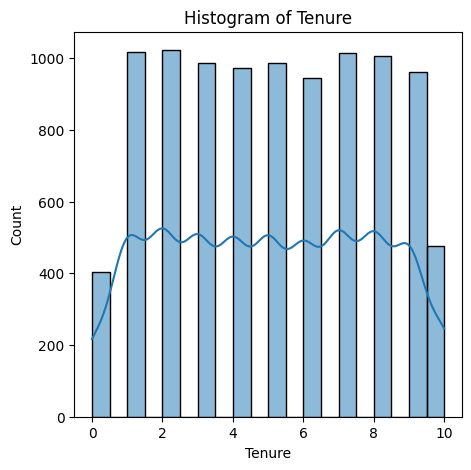

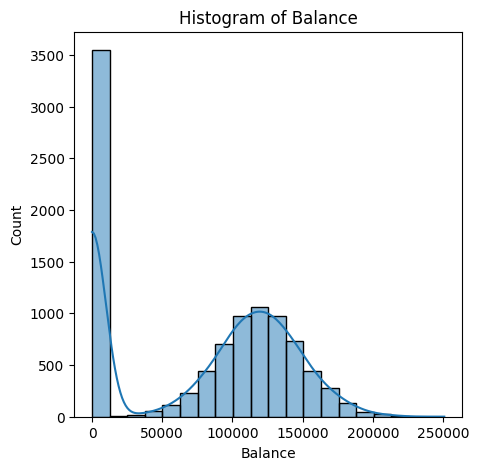

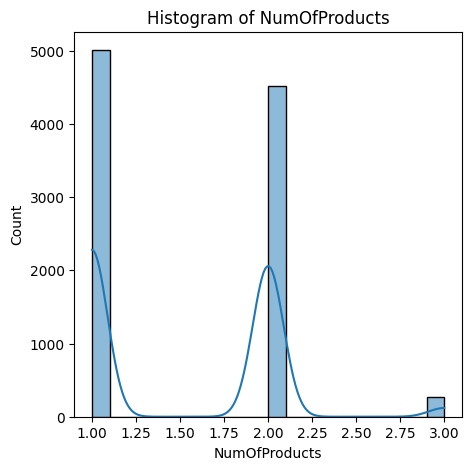

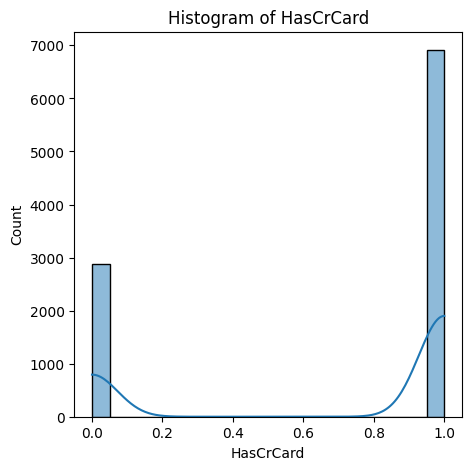

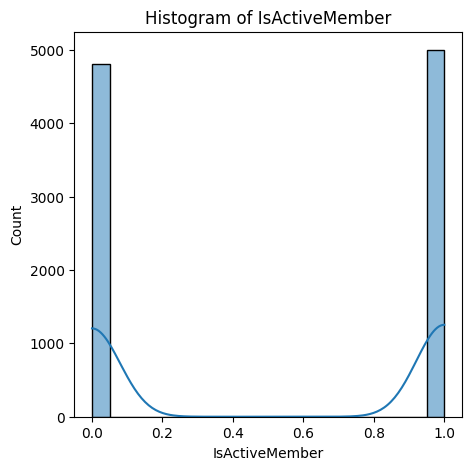

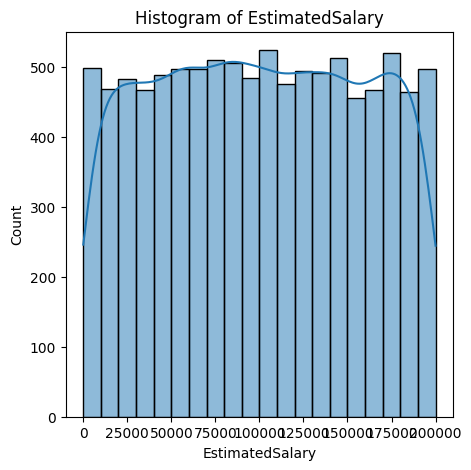

In [223]:
for column in num_column:
    plt.figure(figsize=(5,5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'{"Histogram"} of {column}')


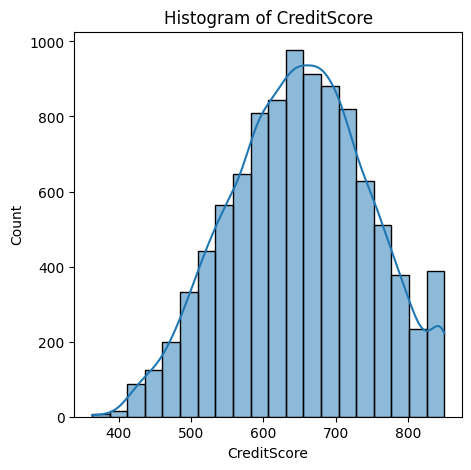

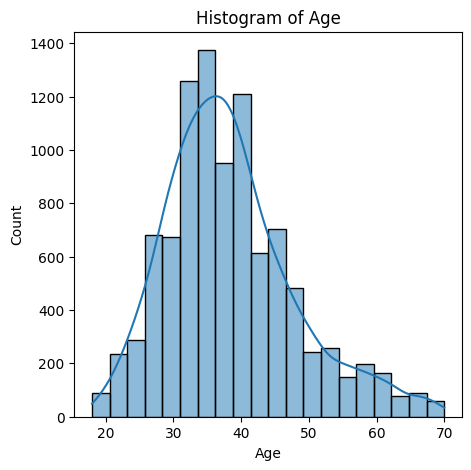

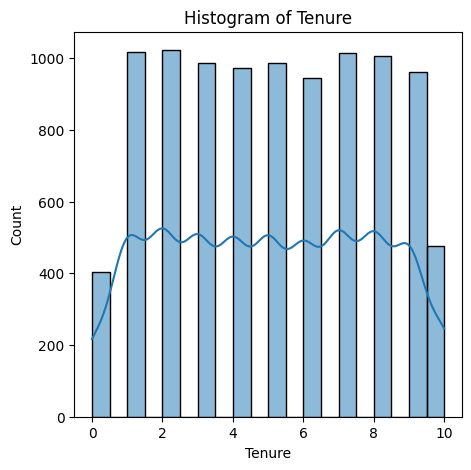

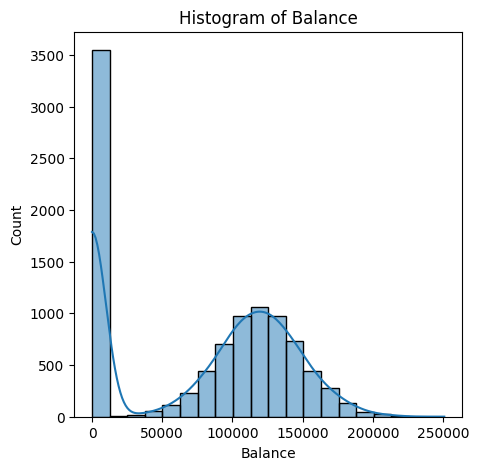

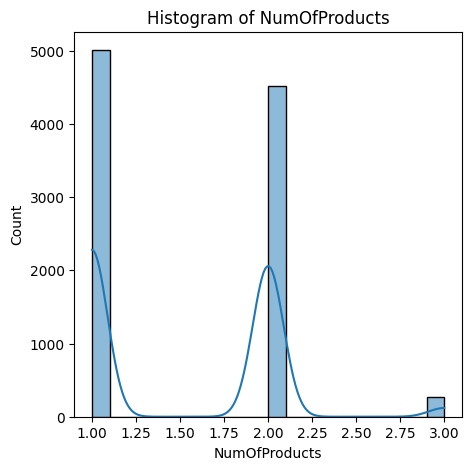

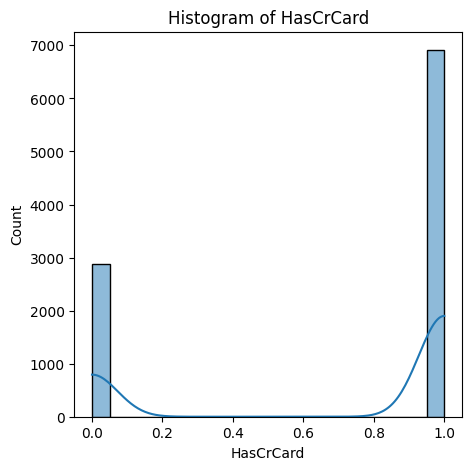

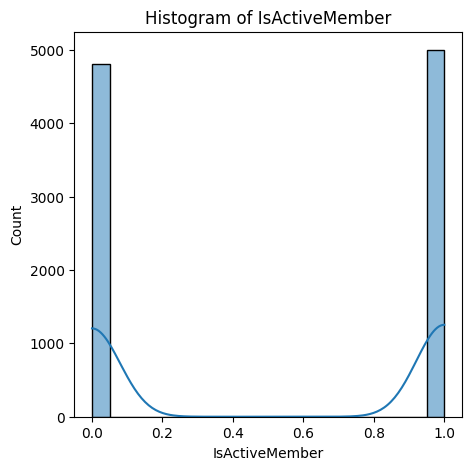

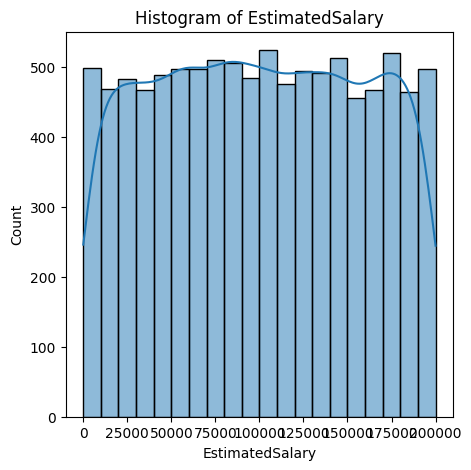

In [224]:
for column in num_column:
    plt.figure(figsize=(5,5))
    sns.histplot(df[column], bins=20, kde=True,)
    plt.title(f'{"Histogram"} of {column}')
    

In [225]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [226]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [227]:
df.groupby('Geography')[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary']].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,
France,649.547343,37.933618,5.003054,62215.706980,1.515781,0.707799,0.510283,99797.836579
Germany,651.854694,39.249388,5.011837,119784.195653,1.496735,0.712245,0.494286,101237.879265
Spain,651.423882,38.422240,5.029955,61657.501572,1.533853,0.693886,0.525236,99275.820259


In [228]:
c1 = df[df['Geography'] == 'France']['CreditScore']
c2 = df[df['Geography'] == 'Germany']['CreditScore']
c3 = df[df['Geography'] == 'Spain']['CreditScore']
p_val= stats.f_oneway(c1,c2,c3)
print(p_val)


F_onewayResult(statistic=0.589892189022475, pvalue=0.554406744196918)


In [229]:
c1 = df[df['Geography']== 'France']['Age']
c2 = df[df['Geography']== 'Germany']['Age']
c3 = df[df['Geography']== 'Spain']['Age']

p_val= stats.f_oneway(c1,c2,c3)
print(p_val)

F_onewayResult(statistic=15.219682985367701, pvalue=2.5143453158775144e-07)


In [230]:
c1 = df[df['Geography']=='France']['Tenure']
c2 = df[df['Geography']== 'Germany']['Tenure']
c3 = df[df['Geography']== 'Spain']['Tenure']

p_val = stats.f_oneway(c1,c2,c3)
print(p_val)

F_onewayResult(statistic=0.07050956009162787, pvalue=0.9319193032586424)


In [231]:
categorical_column=['Geography', 'Gender']

In [232]:
numerical_column = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary']

# Custom Function for Statistical testing 

In [233]:
def anova_test(df, categorical_column, numeric_column):
    categories = df[categorical_column].unique()
    category_data = [df[df[categorical_column] == category][numeric_column] for category in categories]
    p_val = stats.f_oneway(*category_data)
    return p_val

In [234]:
categorical_column = 'Geography'
numeric_column = 'Age'
p_val = anova_test(df, categorical_column, numeric_column)
print(f"ANOVA p-value for {numeric_column} grouped by {categorical_column}: {p_val}")

ANOVA p-value for Age grouped by Geography: F_onewayResult(statistic=15.219682985367701, pvalue=2.5143453158775144e-07)


In [235]:
categorical_column = 'Geography'
numeric_column = 'Tenure'
p_val = anova_test(df, categorical_column, numeric_column)
print(f"ANOVA p-value for {numeric_column} grouped by {categorical_column}: {p_val}")

ANOVA p-value for Tenure grouped by Geography: F_onewayResult(statistic=0.07050956009162786, pvalue=0.9319193032586424)


In [240]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited', ylabel='IsActiveMember'>

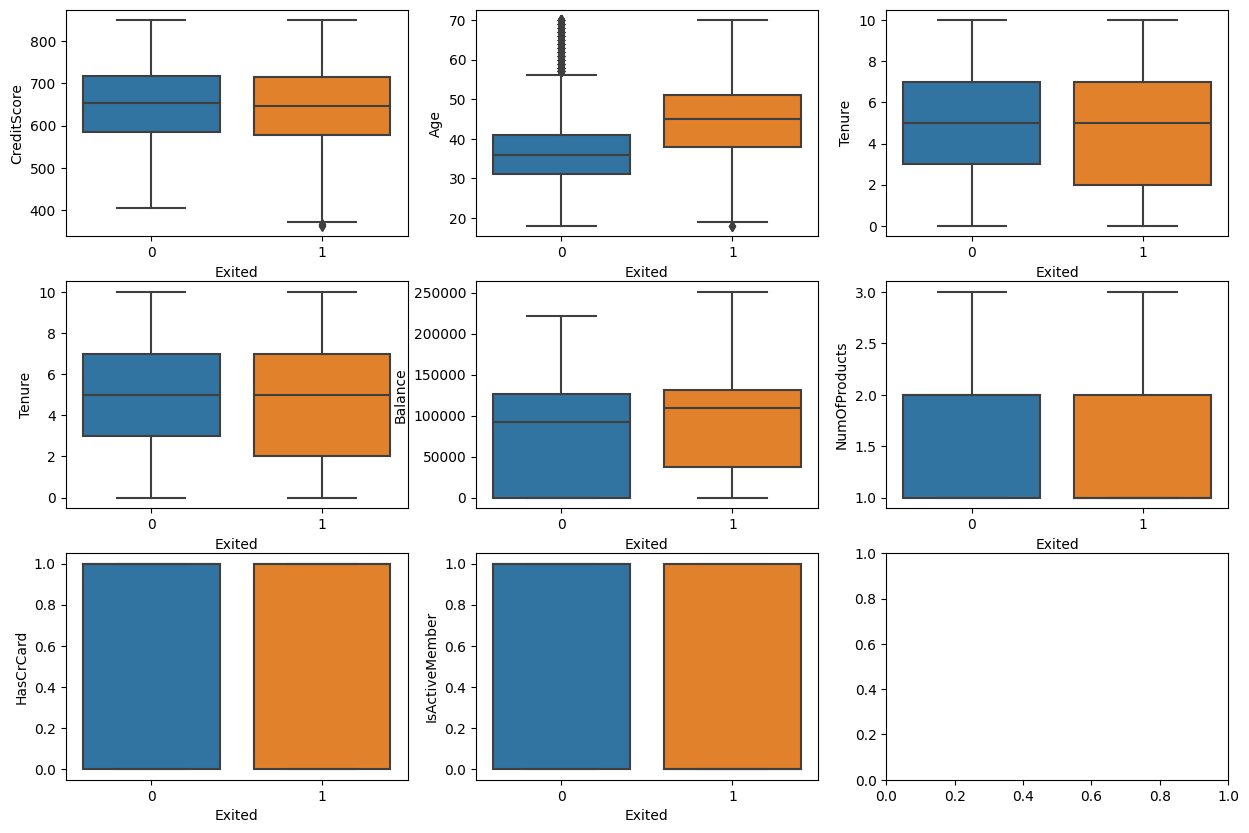

In [245]:
fig, axs = plt.subplots(3,3, figsize=(15,10))
sns.boxplot(y='CreditScore', x='Exited', data=df,ax=axs[0][0])
sns.boxplot(y='Age', x='Exited', data=df, ax=axs[0][1])
sns.boxplot(y='Tenure', x='Exited', data=df,ax=axs[0][2])
sns.boxplot(y='Tenure', x='Exited', data=df, ax=axs[1][0])
sns.boxplot(y='Balance', x='Exited', data=df, ax=axs[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', data=df, ax=axs[1][2])
sns.boxplot(y='HasCrCard', x='Exited', data=df, ax=axs[2][0])
sns.boxplot(y='IsActiveMember', x='Exited', data=df, ax=axs[2][1])


Initial Hypothesis:

Age, Tenure, Balance can be a strong predictor for Exited target variable 

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9798 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9798 non-null   int64  
 1   Surname          9798 non-null   object 
 2   CreditScore      9798 non-null   int64  
 3   Geography        9798 non-null   object 
 4   Gender           9798 non-null   object 
 5   Age              9798 non-null   int64  
 6   Tenure           9798 non-null   int64  
 7   Balance          9798 non-null   float64
 8   NumOfProducts    9798 non-null   int64  
 9   HasCrCard        9798 non-null   int64  
 10  IsActiveMember   9798 non-null   int64  
 11  EstimatedSalary  9798 non-null   float64
 12  Exited           9798 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


In [254]:
df.groupby(['Geography', 'Exited'])['Surname'].count().unstack()

Exited,0,1
Geography,,
France,4138,773
Germany,1666,784
Spain,2036,401


In [256]:
df.groupby(['Gender', 'Exited'])['Surname'].count().unstack()

Exited,0,1
Gender,,
Female,3344,1089
Male,4496,869


Observations: Most of those who Exit come from Grogrpahical locations like Germany and are women

In [259]:
df[df['Exited']==0].describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.840000e+03,7840,7840.000000,7840,7840,7840.000000,7840.000000,7840.000000,7840.00000,7840.000000,7840.000000,7840.000000,7840.0
unique,NaN,2592,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Scott,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,4138,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569108e+07,NaN,651.662500,NaN,NaN,36.822832,5.035459,72844.250999,1.54477,0.707015,0.548469,99765.675210,0.0
std,7.167938e+04,NaN,95.754414,NaN,NaN,9.029476,2.879299,62860.801656,0.50942,0.455161,0.497677,57389.239211,0.0
min,1.556570e+07,NaN,405.000000,NaN,NaN,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,90.070000,0.0
25%,1.562860e+07,NaN,585.000000,NaN,NaN,31.000000,3.000000,0.000000,1.00000,0.000000,0.000000,50895.310000,0.0
50%,1.569152e+07,NaN,653.000000,NaN,NaN,36.000000,5.000000,92221.885000,2.00000,1.000000,1.000000,99620.355000,0.0
75%,1.575308e+07,NaN,718.000000,NaN,NaN,41.000000,7.000000,126474.847500,2.00000,1.000000,1.000000,148590.555000,0.0


In [260]:
df[df['Exited']==1].describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.958000e+03,1958,1958.000000,1958,1958,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.0
unique,NaN,1155,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,McGregor,NaN,Germany,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9,NaN,784,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569051e+07,NaN,646.300817,NaN,NaN,44.635853,4.917773,90997.456502,1.398366,0.699183,0.355975,101078.784454,1.0
std,7.289307e+04,NaN,98.583685,NaN,NaN,9.595428,2.935150,58371.582587,0.680134,0.458730,0.478930,57937.945403,0.0
min,1.556571e+07,NaN,363.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,1.562784e+07,NaN,578.250000,NaN,NaN,38.000000,2.000000,37010.225000,1.000000,0.000000,0.000000,51552.600000,1.0
50%,1.568993e+07,NaN,647.000000,NaN,NaN,45.000000,5.000000,109048.595000,1.000000,1.000000,0.000000,101331.765000,1.0
75%,1.575377e+07,NaN,716.000000,NaN,NaN,51.000000,7.000000,131355.072500,2.000000,1.000000,1.000000,152443.857500,1.0


Based on the Analysis we have conducted so far we can conclude that Age, Tenure, Balance, Gender, and Geography can be a strong predictor for Exited target variable 

In [261]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [262]:
relevant_column = ['Geography', 'Gender', 'Age','Tenure', 'Balance', 'Exited']

In [263]:
new_df = df[relevant_column]

In [264]:
new_df

,Geography,Gender,Age,Tenure,Balance,Exited
0,France,Female,42,2,0.00,1
2,France,Female,42,8,159660.80,1
3,France,Female,39,1,0.00,0
4,Spain,Female,43,2,125510.82,0
5,Spain,Male,44,8,113755.78,1
...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,0
9996,France,Male,35,10,57369.61,0
9997,France,Female,36,7,0.00,1
9998,Germany,Male,42,3,75075.31,1


In [265]:
num_columns = ['Age','Tenure', 'Balance']

In [266]:
cat_column= ['Geography', 'Gender']

In [267]:
target = 'Exited'

In [269]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor=(ColumnTransformer(transformers=[('cat', cat_transformer, cat_column),
                                              ('num', num_transformer, num_column )]))

In [275]:
X_train, X_test, y_train, y_test = train_test_split(new_df[cat_column + num_columns], new_df[target], test_size=0.2, random_state=123)


In [276]:
x_train_transformed= preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

ValueError: A given column is not a column of the dataframe